<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/06.1-conv-cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 217 (delta 56), reused 40 (delta 12), pack-reused 89
Receiving objects: 100% (217/217), 15.20 MiB | 21.23 MiB/s, done.
Resolving deltas: 100% (93/93), done.
/content/SRU-deeplearning-workshop


In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

Dataset link:  
https://www.cs.toronto.edu/~kriz/cifar.html  

Previously:  


```
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

temp = unpickle('cifar-10-batches-py/data_batch_1')
temp.keys()
     
out>> dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
```



In [3]:
cifar_date = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
print(type(cifar_date))

<class 'tuple'>


In [5]:
(x_train, y_train), (x_test, y_test) = cifar_date

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

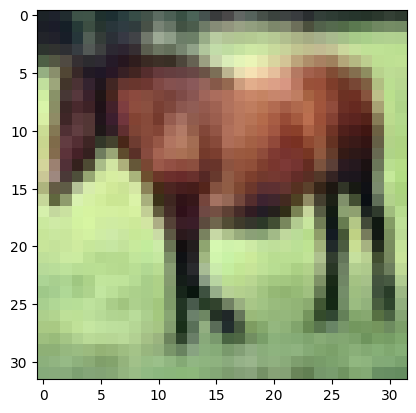

In [6]:
'''
using from keras.datasets import cifar10
loads all of the images correcly without any need to preprocess
the reshape > tranpose > to be in the RGB order
'''
plt.imshow(x_train[7])

# Preprocess

In [7]:
print(x_train.shape, x_train.dtype)
print(y_train.shape)

(50000, 32, 32, 3) uint8
(50000, 1)


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [9]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Train

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [14]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=opt_rms, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train,batch_size=64,epochs=25,
                    validation_data=(x_test,y_test))

'''
We assume that the acc on the train must be better than the val.
This can be violated if:
1. we choose hard data for train > not in this case
2. we have drop out > drop out make the model less complex and 
  will be operated on the train epochs not validation or test
3. severe augmentation on train dataset
--it is not good if there is a huge gap > fix it
'''

Epoch 1/25
782/782 [==============================] - 19s 7ms/step - loss: 1.8304 - accuracy: 0.3250 - val_loss: 1.6036 - val_accuracy: 0.4187
Epoch 2/25
782/782 [==============================] - 4s 4ms/step - loss: 1.5391 - accuracy: 0.4426 - val_loss: 1.6367 - val_accuracy: 0.4294
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 1.4141 - accuracy: 0.4923 - val_loss: 1.3255 - val_accuracy: 0.5279
Epoch 4/25
782/782 [==============================] - 5s 6ms/step - loss: 1.3338 - accuracy: 0.5256 - val_loss: 1.3188 - val_accuracy: 0.5246
Epoch 5/25
782/782 [==============================] - 5s 7ms/step - loss: 1.2727 - accuracy: 0.5485 - val_loss: 1.2111 - val_accuracy: 0.5799
Epoch 6/25
782/782 [==============================] - 6s 7ms/step - loss: 1.2250 - accuracy: 0.5660 - val_loss: 1.1460 - val_accuracy: 0.5951
Epoch 7/25
782/782 [==============================] - 5s 7ms/step - loss: 1.1873 - accuracy: 0.5817 - val_loss: 1.0772 - val_accuracy: 0.6164
Epoch

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8973 - accuracy: 0.6940


[0.8973055481910706, 0.6940000057220459]

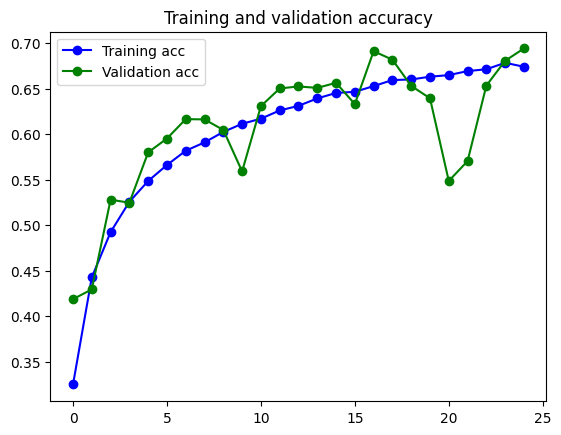

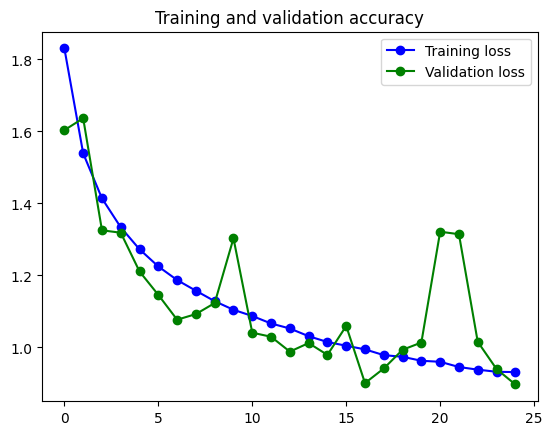

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, "b-o", label="Training acc")
plt.plot(epochs, val_acc, "g-o", label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, "b-o", label="Training loss")
plt.plot(epochs, val_loss, "g-o", label="Validation loss")
plt.title('Training and validation accuracy')
plt.legend()